<a href="https://colab.research.google.com/github/lie-42/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결측치 제거

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [3]:
df.dropna(axis=1)

""
0
1
2
3
4


In [4]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [6]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [8]:
df.score.mean()

np.float64(4.0)

In [9]:
df['score'].sum()

np.float64(16.0)

In [12]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [16]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, pd.Timestamp("1940-04-25"), pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [17]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [18]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [19]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [20]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [21]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [22]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [23]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [24]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [27]:
df.dropna(subset=['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


#빈 데이터프레임 확인 방법 df.empty

In [31]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [29]:
df1.empty

True

In [32]:
df2 = pd.DataFrame(columns=['col1','col2','col3'])
df2

,col1,col2,col3


In [33]:
df2.empty

True

In [34]:
df3 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns=['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [35]:
df3.empty



False

In [36]:
df4 = pd.DataFrame(np.nan,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df4

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [37]:
df4.empty

False

In [39]:
df5 = pd.DataFrame(2,
                  index = ['row1', 'row2', 'row3'],
                  columns=['col1','col2','col3'])
df5

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [40]:
df5.empty

False

#결측값 대체

In [41]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 6.01 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [42]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [43]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [44]:
type(exam.loc[[2, 7, 14], ['math']])

pandas.core.frame.DataFrame

In [45]:
type(
exam.loc[[2, 7, 14], 'math'])

pandas.core.series.Series

In [46]:
exam.loc[[2,7,14],'math']

,math
2,NaN
7,NaN
14,NaN


In [47]:
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


#결측값 채워넣기 fillna()

In [52]:
exam['math'] = exam['math'].fillna(0)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,0.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,0.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [51]:
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,0.0,86,78
7,8,2,0.0,78,25
14,15,4,0.0,56,78


In [54]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [55]:
exam['math']=exam['math'].fillna(exam['math'].mean())
exam

,id,nclass,math,english,science
0,1,1,50.000000,98,50
1,2,1,60.000000,97,60
2,3,1,55.235294,86,78
3,4,1,30.000000,98,58
4,5,2,25.000000,80,65
5,6,2,50.000000,89,98
6,7,2,80.000000,90,45
7,8,2,55.235294,78,25
8,9,3,20.000000,98,15
9,10,3,50.000000,98,45


In [56]:
pd.set_option('display.precision', 2)
exam.loc[[2,7,14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [57]:
exam.math.isna().sum()

np.int64(0)

In [71]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [59]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [60]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [61]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [62]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [63]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [64]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [65]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [66]:
df['score'] = np.where(df['score'] > 5 , np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [72]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1,4.67
2,3.00
3,4.00


In [67]:
df = pd.DataFrame([1])
df

,0
0,1


In [73]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [74]:
df = pd.DataFrame([[1, 1, 2, 2]])
df


,0,1,2,3
0,1,1,2,2


In [75]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [76]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [80]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [81]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [84]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [86]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [87]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [88]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [90]:
type(df.loc[2,'x2'])

int

#이상값 알아보기 outlier

In [91]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
73,dodge,ram 1500 pickup 4wd,5.9,1999,8,auto(l4),4,11,15,r,pickup
38,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan
107,honda,civic,2.0,2008,4,manual(m6),f,21,29,p,subcompact
219,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [92]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [95]:
%config InlineBackend.figure_format = 'retina'

In [97]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


<Axes: ylabel='hwy'>

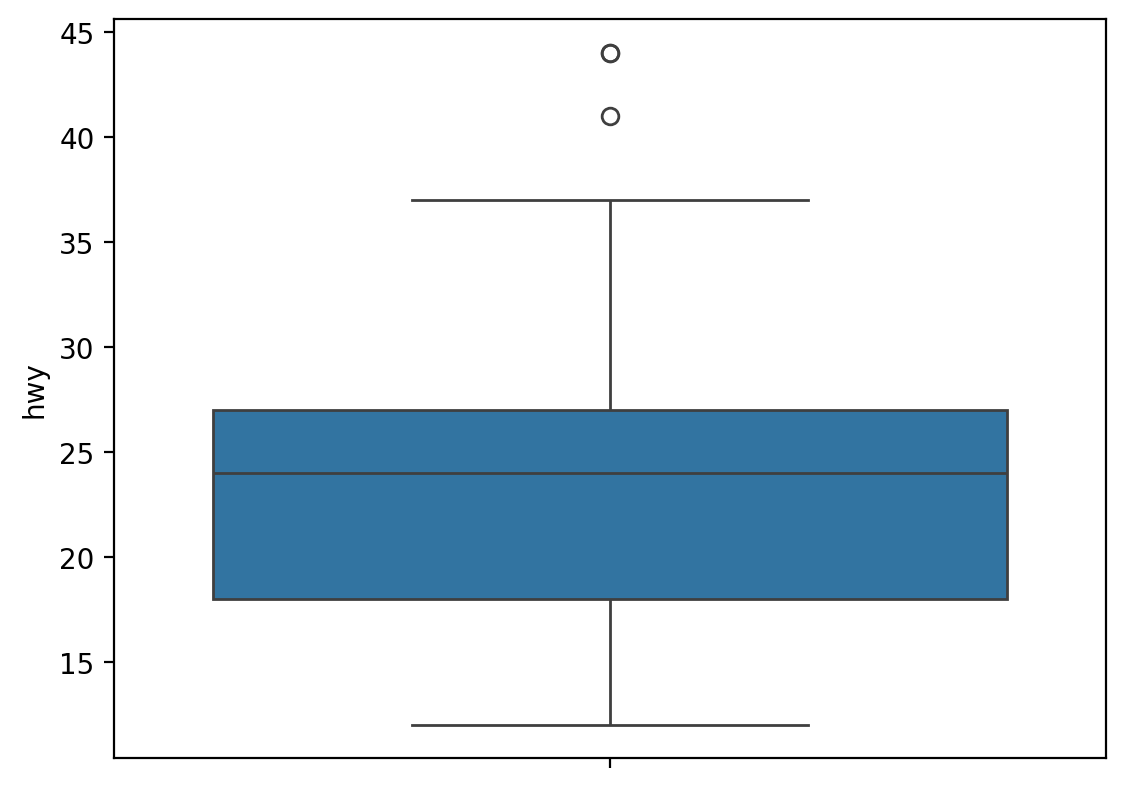

In [96]:
import seaborn as sns
sns.boxplot(data=mpg, y='hwy')

#맨위는 이상값
#iqr 25~75퍼센트 - 박스의 높이, 길이 // 박스 길이의 1.5배 를 벗어나면 아웃 라이어/ 위,아래
#정상범위에서의 가장큰값, 정상범위에서의 가장 작은값 iqr

#박스플롯의 구성요소


In [100]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [103]:
s.quantile([.1, .25, .50, .75, 1])

,0
0.10,1.4
0.25,2.0
0.50,3.0
0.75,4.0
1.00,5.0


In [102]:
s.quantile()
##미디안값 . 정중앙에 있는값

np.float64(3.0)

In [104]:
s.quantile(.5)

np.float64(3.0)

In [105]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [106]:
mpg.hwy.quantile([.1, .25, .50, .75, 1])

,hwy
0.10,16.3
0.25,18.0
0.50,24.0
0.75,27.0
1.00,44.0


In [107]:
a,b=[10,20]
a

b

20

In [108]:
a


10

In [109]:
b

20

In [110]:
pct25, pct50, pct75 = mpg['hwy'].quantile([.25, .5, .75])
pct25

18.0

In [111]:
pct50

24.0

In [112]:
iqr = pct75 - pct25
iqr

9.0

In [114]:
## upper fence
upper_fence = pct75 + 1.5 * iqr
upper_fence

40.5

In [113]:
## lower fence
lower_fence = pct25 - 1.5 * iqr
lower_fence

4.5

In [115]:
mpg['hwy'].describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [116]:
mpg['hwy'].describe()['25%']

np.float64(18.0)

In [117]:
mpg['hwy'].describe()['max']

np.float64(44.0)

In [119]:
mpg[mpg.hwy > upper_fence]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [120]:
mpg[mpg.hwy < lower_fence]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [121]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [123]:
mpg[(mpg.hwy > upper_fence) | (mpg.hwy < lower_fence)]


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [124]:
mpg['hwy'] = np.where((mpg['hwy'] < lower_fence) | (mpg['hwy'] > upper_fence), np.nan, mpg['hwy'])

In [125]:
mpg['hwy'].isna().sum()

np.int64(3)

In [126]:
mpg[ mpg.hwy.isna()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [128]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [129]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


#7장 종료
